In [ ]:
# Set current working directory to the folder containing this file
import os
os.chdir(os.path.dirname(os.path.realpath(__file__)))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import metrics

from Navajo_Load_Profiles_Functions import *


folders = create_folders()

avg_seasonal_load_profiles_df = pd.read_csv(f"{folders['Aggregated Load Profiles']}\\Average Seasonal Load Profiles.csv", index_col=[0], header=[0, 1, 2])
seasonal_hourly_load_profiles_df = calc_hourly_df(avg_seasonal_load_profiles_df)
seasonal_hourly_load_profiles_df = shift_hourly(seasonal_hourly_load_profiles_df, 7)
seasonal_hourly_load_profiles_df = seasonal_hourly_load_profiles_df.loc[:, [col for col in seasonal_hourly_load_profiles_df.columns if int(col[0]) in LOCATIONS]]
seasonal_hourly_load_profiles_df = seasonal_hourly_load_profiles_df.loc[:, (seasonal_hourly_load_profiles_df >= 0).all()]  # crop out cols with negatives

print(seasonal_hourly_load_profiles_df.iloc[:3, :4])

X = seasonal_hourly_load_profiles_df.values
X = X.T
X_norm = sklearn.preprocessing.normalize(X, norm='l1')
plt.plot(X_norm.T)
plt.show()

Location            1001                                    
Year                2021                                    
Season           Jan-Mar     Apr-Jun     Jul-Sep     Oct-Dec
Hourly Index                                                
0             108.092706  191.996064  220.581296  188.694210
1             109.252901  187.550719  222.013852  195.975880
2             108.936848  187.987243  222.063549  198.643782


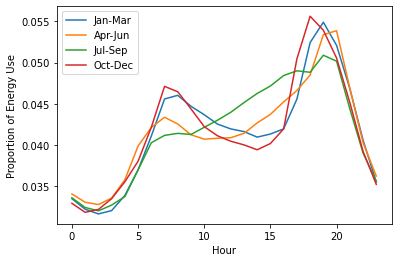

In [15]:
# seasonal_df = hourly_load_profiles_df.copy()
# X = seasonal_df.values
# X = X.T
# X_norm = sklearn.preprocessing.normalize(X, norm='l1')
yearly_norm_df = pd.DataFrame(X_norm.T, index=seasonal_hourly_load_profiles_df.index, columns=seasonal_hourly_load_profiles_df.columns)

for season in ['Jan-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Dec']:
    plt.plot(yearly_norm_df.xs(season, axis=1, level=2).mean(axis=1), label=f'{season}')
# plt.legend(scatterpoints=1)
plt.ylabel("Proportion of Energy Use")
plt.xlabel("Hour")
plt.legend(loc='upper left')
plt.show()

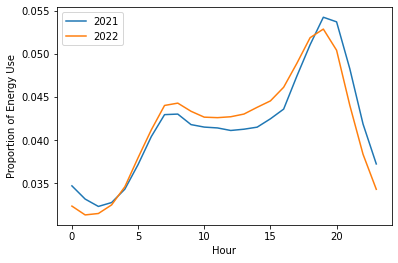

In [16]:
yearly_df = seasonal_hourly_load_profiles_df.groupby(level=[0, 1], axis=1).mean()
X = yearly_df.values
X = X.T
X_norm = sklearn.preprocessing.normalize(X, norm='l1')
yearly_norm_df = pd.DataFrame(X_norm.T, index=yearly_df.index, columns=yearly_df.columns)

for year in ['2021', '2022']:
    plt.plot(yearly_norm_df.xs(year, axis=1, level=1).mean(axis=1), label=f'{year}')
# plt.legend(scatterpoints=1)
plt.ylabel("Proportion of Energy Use")
plt.xlabel("Hour")
plt.legend(loc='upper left')
plt.show()